In [5]:
%matplotlib inline

In [10]:
import numpy as np
import csv
import matplotlib
from  matplotlib import pyplot as plt
# from sklearn import cross_validation
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn import metrics, preprocessing
import pickle
import numpy.linalg as la
import random

In [6]:
df = pd.read_csv("data.csv")

In [7]:
df.head(5)

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [34]:
X= df.as_matrix()

In [ ]:
class K Means:
    def __init__(n_clusters , max_iter):
        self.k = n_clusters ## number of clusters
        self.max_iter = max_iter ## number of iterations
    def fit_KMeans(self, data):
        cluster_center = X[np.random.choice(n, self.k, False), :]

In [27]:
def calcJ (data , centers ):
    diffsq = ((centers[:,np.newaxis,:]) - data)**2
    return np.sum(np.min(np.sum(diffsq ,axis=2), axis=0))
def kmeans (data ,k = 2 , n = 5 ):
    # Initialize centers and list J to track performance metric
    centers = data [np.random.choice(range(data.shape[0]),k, replace=False) , : ]
    J = []
    #repeat n times 
    for iteration in range(n):
        #Find center that each observation is closest to
        sqdistances = np.sum((centers[:,np.newaxis, :] - data)**2, axis=2) 
        closest =np.argmin(sqdistances, axis = 0)
        ##Calculate J and append to list J 
        J.append(calcJ(data,centers))
        #Update cluster centers 
        for i in range(k):
            ## get the average of distance from each data point to its center
            centers[i, :] = data[closest ==i, :].mean(axis=0)
        J.append(calcJ(data,centers))
        return centers, J, closest

In [57]:
centers, J,closest = kmeans(X, 2, 10)

In [58]:
centers

array([[  4.37731522,  84.48913043],
       [  3.03313333,  63.95      ]])

In [59]:
J

[56596.954101000003, 17979.045594406154]

In [60]:
closest

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1])

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


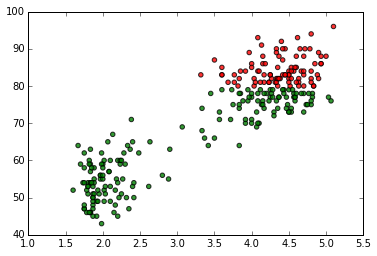

In [61]:
colors = ['r' if i==0 else 'g' for i in closest]
ax = plt.gca()
ax.scatter(X[:,0], X[:,1], c=colors, alpha=0.8)
plt.show()

In [81]:
centers2, J2,closest2 = kmeans(X, 2, 100)

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


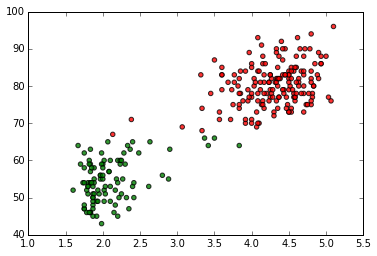

In [82]:
colors = ['r' if i==0 else 'g' for i in closest2]
ax = plt.gca()
ax.scatter(X[:,0], X[:,1], c=colors, alpha=0.8)
plt.show()

As the number of iterations increases the clustering gets better

In [49]:
cluster1 = []
cluster2 = []
m =0
while m < len(closest):
    if closest[m] ==0:
        cluster1.append(X[m])
    else:
        cluster2.append(X[m])
    m +=1

In [ ]:
df.plot(kind='scatter', x='eruptions', y='waiting')

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100
for c, m, zl, zh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = X[0]
    ys = X[1]
    zs = 10
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [ ]:
Axes3D.scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)

In [32]:
len(closest)

272

In [11]:
def getFirstMeans(trainData,k):
    firstMeans = []
    idxs = [x for x in range(len(trainData))]
    meanIdxs = random.sample(idxs,k)
    for idx in meanIdxs:
        firstMeans.append(trainData.iloc[idx].values)
    return firstMeans

def clustering(trainData,clusterMeans,k):
    rowIdxs = [i for i in range(len(trainData))]
    clusters = []
    for num in range(k):
        clusters.append([])
    
    for row in rowIdxs :
        distances = []
        for mean in clusterMeans:
            dist = np.linalg.norm(trainData.iloc[row] - mean)
            distances.append(dist)
        clusterIdx = np.argmin(distances)
        
        clusters[clusterIdx].append(row)
    return clusters
    
def newMeans(trainData,clusters):
    means = []
    for cluster in clusters:
        clusterMean = np.mean(trainData.iloc[cluster])
        means.append(clusterMean)
    return means

def KMeans(trainData,k):
    iters = 0
    initMeans = getFirstMeans(trainData,k)
    clusters1 = clustering(trainData,initMeans,k)
    means1 =  newMeans(trainData,clusters1)
    clusters2 = clustering(trainData,means1,k)
    means2 = newMeans(trainData,clusters2)
    
    while clusters1 != clusters2:
        print ("iteration: " + str(iters+1))
        clusters1 = clustering(trainData,means2,k)
        means1 = newMeans(trainData,clusters1)
        clusters2 = clustering(trainData,means1,k)
        means2 = newMeans(trainData,clusters2)
        iters += 1
    
    return clusters2

In [77]:
k = 2
kMeansCluster = KMeans(df,k)

iteration: 1
iteration: 2


In [78]:
cluster1 = kMeansCluster[0]
cluster2 = kMeansCluster[1]

In [71]:
clusters = np.zeros(len(cluster1)+len(cluster2))

In [79]:
for item in cluster1:
    clusters[item] = 0
for item in cluster2:
    clusters[item] = 1

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


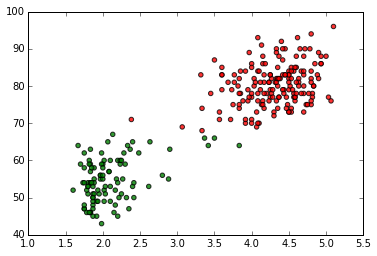

In [80]:
colors = ['r' if i==0 else 'g' for i in clusters]
ax = plt.gca()
ax.scatter(X[:,0], X[:,1], c=colors, alpha=0.8)
plt.show()

[1,
 3,
 5,
 8,
 10,
 13,
 15,
 16,
 18,
 20,
 21,
 26,
 32,
 35,
 36,
 38,
 41,
 43,
 46,
 47,
 49,
 52,
 54,
 57,
 60,
 62,
 64,
 68,
 71,
 74,
 76,
 83,
 88,
 90,
 92,
 94,
 98,
 100,
 102,
 105,
 107,
 111,
 114,
 116,
 118,
 120,
 123,
 126,
 128,
 130,
 132,
 134,
 136,
 138,
 141,
 145,
 147,
 149,
 152,
 158,
 160,
 162,
 164,
 166,
 168,
 170,
 171,
 177,
 180,
 184,
 187,
 189,
 191,
 198,
 200,
 203,
 205,
 208,
 212,
 214,
 216,
 218,
 220,
 222,
 231,
 233,
 235,
 236,
 239,
 241,
 243,
 246,
 248,
 250,
 258,
 262,
 264,
 265,
 268,
 270]